In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from bias_fairness.utils import timer,profile_data
from bias_fairness.prep_data import impute_nan, encode_categorical

# Load & Prepare data

In [32]:
raw_df = pd.read_csv('Titanic-Dataset.csv')
raw_df = raw_df.drop(columns=['Name','Ticket'])
raw_df.columns = raw_df.columns.str.lower()
raw_df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [33]:
profile_data(raw_df)

function: profile_data is starting...
function: profile_data successfully executed at 0.009963035583496094s


,features,dtype,missing,missing%,nunique,sample
0,passengerid,int64,0,0.000000,891,"[1, 2, 3, 4, 5]"
1,survived,int64,0,0.000000,2,"[0, 1]"
2,pclass,int64,0,0.000000,3,"[3, 1, 2]"
3,sex,object,0,0.000000,2,"[male, female]"
4,age,float64,177,0.198653,88,"[22.0, 38.0, 26.0, 35.0, nan]"
5,sibsp,int64,0,0.000000,7,"[1, 0, 3, 4, 2]"
6,parch,int64,0,0.000000,7,"[0, 1, 2, 5, 3]"
7,fare,float64,0,0.000000,248,"[7.25, 71.2833, 7.925, 53.1, 8.05]"
8,cabin,object,687,0.771044,147,"[nan, C85, C123, E46, G6]"
9,embarked,object,2,0.002245,3,"[S, C, Q, nan]"


- impute NaN

In [34]:
ttn_df = impute_nan(raw_df)
ttn_df

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,7.2500,Unknown,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,Unknown,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,Unknown,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,0.0,1,2,23.4500,Unknown,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [35]:
profile_data(ttn_df)

function: profile_data is starting...
function: profile_data successfully executed at 0.009855508804321289s


,features,dtype,missing,missing%,nunique,sample
0,passengerid,int64,0,0.0,891,"[1, 2, 3, 4, 5]"
1,survived,int64,0,0.0,2,"[0, 1]"
2,pclass,int64,0,0.0,3,"[3, 1, 2]"
3,sex,object,0,0.0,2,"[male, female]"
4,age,float64,0,0.0,89,"[22.0, 38.0, 26.0, 35.0, 0.0]"
5,sibsp,int64,0,0.0,7,"[1, 0, 3, 4, 2]"
6,parch,int64,0,0.0,7,"[0, 1, 2, 5, 3]"
7,fare,float64,0,0.0,248,"[7.25, 71.2833, 7.925, 53.1, 8.05]"
8,cabin,object,0,0.0,148,"[Unknown, C85, C123, E46, G6]"
9,embarked,object,0,0.0,4,"[S, C, Q, Unknown]"


In [36]:
ttn_df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [38]:
ttn_df['embarked'].value_counts()

embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

In [46]:
encode_categorical(df = ttn_df,cat_cols=['sex','embarked'] )

,passengerid,survived,pclass,age,sibsp,parch,fare,cabin,is_male,embarked_C,embarked_Q,embarked_S,embarked_Unknown
0,1,0,3,22.0,1,0,7.2500,Unknown,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,C85,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,Unknown,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,Unknown,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,Unknown,1,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,B42,0,0,0,1,0
888,889,0,3,0.0,1,2,23.4500,Unknown,0,0,0,1,0
889,890,1,1,26.0,0,0,30.0000,C148,1,1,0,0,0


In [ ]:
# pending ordinalllll & col ที่ nunique เยอะจัดๆๆๆ

sex ➜ protected class (gender)

pclass, embarked ➜ proxy variables

fare, age ➜ calibration or demographic parity metrics

survived ➜ outcome variable (target)

In [ ]:
# get feature (x) list
# define พวก sensitive group จะทำข้างนอก

In [ ]:
# change sex to is_male

# Analyze Data

In [41]:
import bias_fairness.evaluation as eva

In [42]:
anal = eva.AnalyzeData(df = ttn_df,
                      target = 'survived',
                      protected = 'sex')

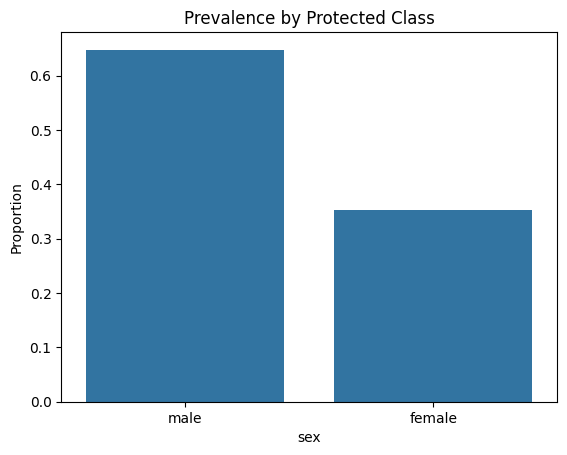

In [23]:
anal.prevalence_plot()

In [24]:
anal.detect_proxy_variables()

KeyError: 'sex'